<a href="https://colab.research.google.com/github/Pradip240/IPL-T20-Cricket-Analysis/blob/main/Ameen_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

##Let's load and explore the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Importing the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [71]:
file_path = '/content/drive/MyDrive/AlmaBetter Data Science/1. PYTHON/CAPSTONE PROJECT/IPL Data/'
matches_df = pd.read_csv(file_path + 'matches.csv')
players_df = pd.read_excel(file_path + 'Players.xlsx')
deliveries_df = pd.read_csv(file_path + 'deliveries.csv')
teams_df = pd.read_csv(file_path + 'teams.csv')
most_runs_average_strikerate_df = pd.read_csv(file_path + 'most_runs_average_strikerate.csv')
teamwise_home_and_away_df = pd.read_csv(file_path + 'teamwise_home_and_away.csv')

In [50]:
#Checking the shape of multiple datasets
ipl_df=[matches_df.shape, Players_df.shape, deliveries_df.shape, teams_df.shape, most_runs_average_strikerate_df.shape, teamwise_home_and_away_df.shape]
ipl_df


[(756, 18), (566, 5), (179078, 21), (15, 1), (516, 6), (14, 7)]

# So what can we expect from the multiple IPL datasets?
##The datasets are:
###1.matches.csv
###2.Players.xlsx
###3.deliveries.csv
###4.teams.csv
###5.most_runs_average_strikerate.csv
###6.teamwise_home_and_away.csv

###In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem.
###The datsets consists of multiple observations & columns. Let's go ahead & get familiar with the columns.

#Cleaning the dataset

##From matches dataset we have:-
###**ID:** Basically the IPL match ID.
###**Season:** The IPL season, which in our dataset if from season 2008 - season 2019
###**City:**The cities where the IPL matches were played.
###**Date:** The date on which the matches were played or held.
###**Team1 & Team2:** The teams participated in the IPL matches since 2008.
###**Toss_winner:** The team that won the toss.
###**Toss_decision:** The decision taken by the toss winning team either to 'Bat' or 'Field' first.
###**Result:** The result column consists of (normal, tie, no result) of the match.
###**Dl_applied:** The column consists the numerical values (0 or 1) which indicates whether the Duckworth-Lewis method was applied or not.
###**Winner:** Winner of the respective match.
###**Win_by_runs:** The runs by which the team batting first won.
###**Win_by_wickets:** The wickets by which the team batting second won.
###**Player_of_the_match:** The player who performed exceptionally good in the match.
###**Venue:** The venue where the match was hosted.
###**Umpire1 & Umpire2:** Two on-field umpires during the match.
###**Umpire3:** Basically the third Umpire.

#Matches Dataset

In [51]:
#Checking the first five observations of matches dataset
matches=matches_df.head()
matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [52]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [54]:
#Checking for the null values in the data
missing_val_matches = matches_df.isnull()
missing_val_matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
752,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
753,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
754,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [55]:
#suming up the null values together
matches_df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

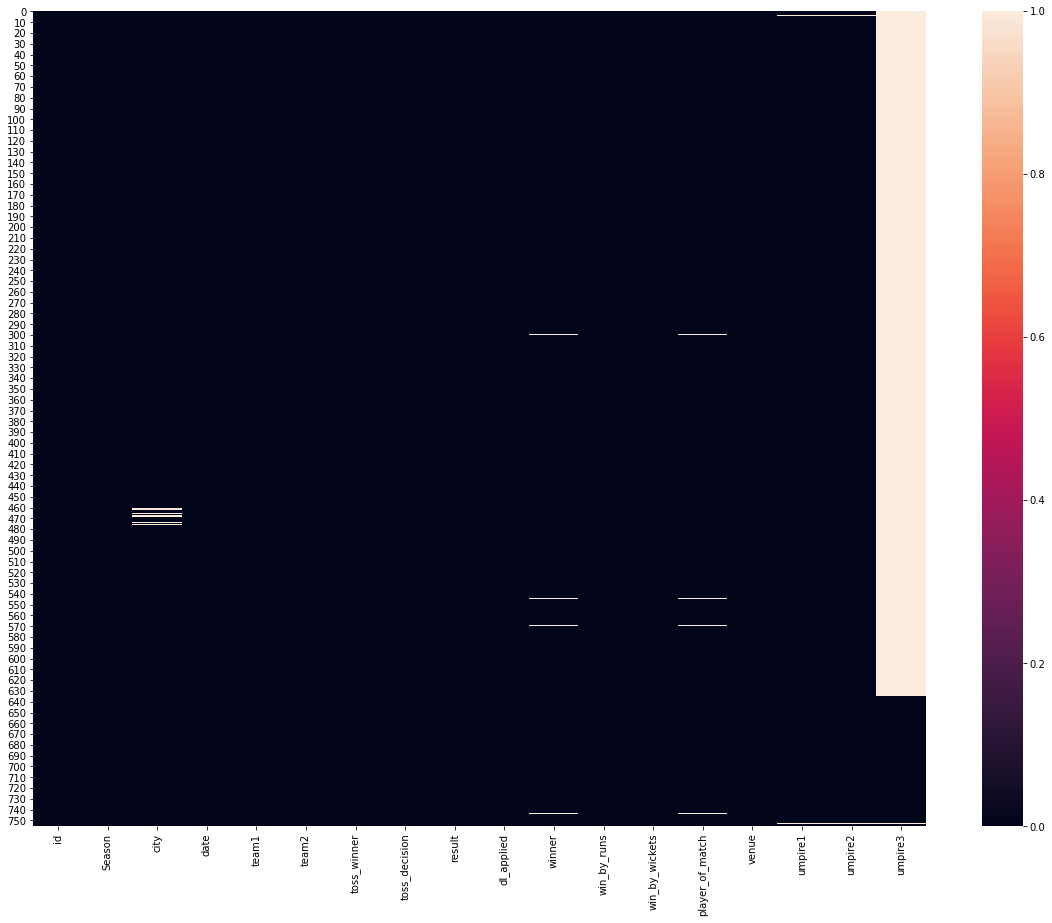

In [56]:
#Plotting the heatmap for the missing values in the matches dataset
plt.figure(figsize=(20,15))
sns.heatmap(missing_val_matches)

In [58]:
#Filling up the numerical missing values
filling_na_matches = matches_df.fillna(matches_df.mean(axis=0))

In [59]:
filled_val_matches = filling_na_matches.isnull()

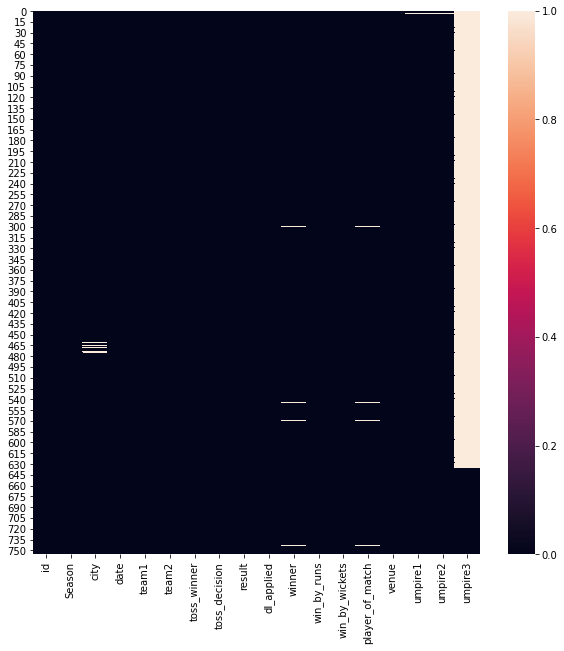

In [60]:
#Plotting the heatmap after filling up the missing numerical values
plt.figure(figsize=(10,10))
sns.heatmap(filled_val_matches)

In [61]:
#Filling up the categorical missing values
filling_na_categorical = matches_df.fillna(matches_df.mode().iloc[0])

In [62]:
filling_na_categorical.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [63]:
filled_val1 = filling_na_categorical.isnull()

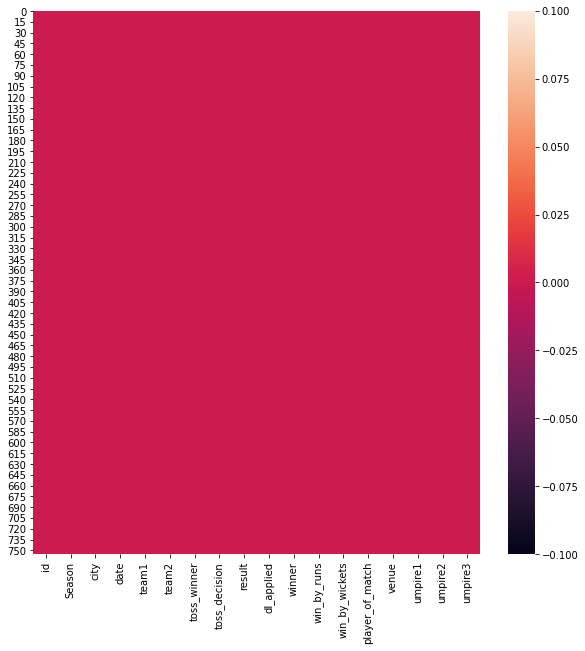

In [64]:
#Plotting the heatmap after filling up the missing categorical values
plt.figure(figsize=(10,10))
sns.heatmap(filled_val1)

#Players Dataset

##From the players dataset:-(rows 556, columns 5)
###*It consists of following columns- player_name, DOB, Batting_skill, Bowling_skill & Country

In [72]:
#Checking the first five observations of players dataset
players = players_df.head()
players

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [73]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            471 non-null    datetime64[ns]
 2   Batting_Hand   563 non-null    object        
 3   Bowling_Skill  502 non-null    object        
 4   Country        471 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.2+ KB


In [87]:
#Finding the unique values from the column Batting Hand
players_df.Batting_Hand.unique()

array(['Right_Hand', 'Right_hand', 'Left_Hand', nan], dtype=object)

In [88]:
#Replacing the names which were misspelled in the column Batting Hand
players_df.replace(to_replace=' Right_Hand', value = 'Right_Hand', inplace=True)
players_df.replace(to_replace=' Left_hand bat', value = 'Left_Hand', inplace=True)
players_df.replace(to_replace='Right_hand', value = 'Right_Hand', inplace=True)
players_df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
count,566,471,563,502,471
unique,566,457,2,16,11
top,DJ Harris,1987-04-30 00:00:00,Right_Hand,Right-arm medium,India
freq,1,3,421,107,264
first,NaN,1969-06-30 00:00:00,NaN,NaN,NaN
last,NaN,1998-07-18 00:00:00,NaN,NaN,NaN


In [89]:
#Checking for the unique values after replacing the names from batting hand
players_df.Batting_Hand.unique()

array(['Right_Hand', 'Left_Hand', nan], dtype=object)

In [75]:
#Suming up all the missing values
players_df.isnull().sum()

#As we can see all the missing values are categorical

Player_Name       0
DOB              95
Batting_Hand      3
Bowling_Skill    64
Country          95
dtype: int64

In [90]:
show =players_df.isnull()

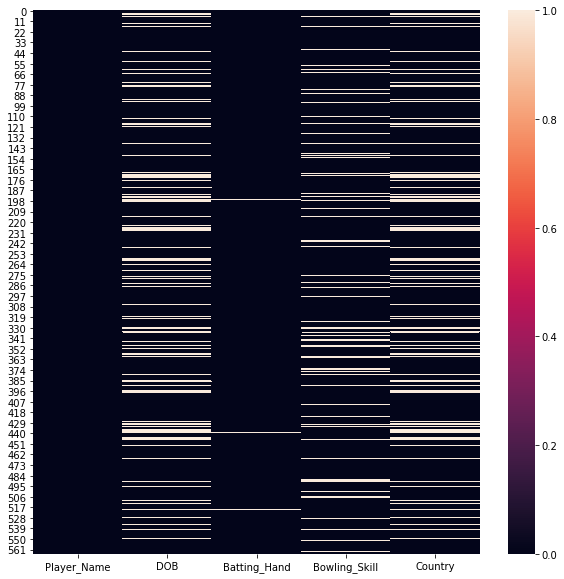

In [91]:
#Plotting the heatmap for the missing values in the players dataset
plt.figure(figsize=(10,10))
sns.heatmap(show)


In [92]:
#Filling up the caetgorical missing values
filling_na_cat1 = players_df.fillna(players_df.mode().iloc[0])

In [93]:
show1 = filling_na_cat1.isnull()

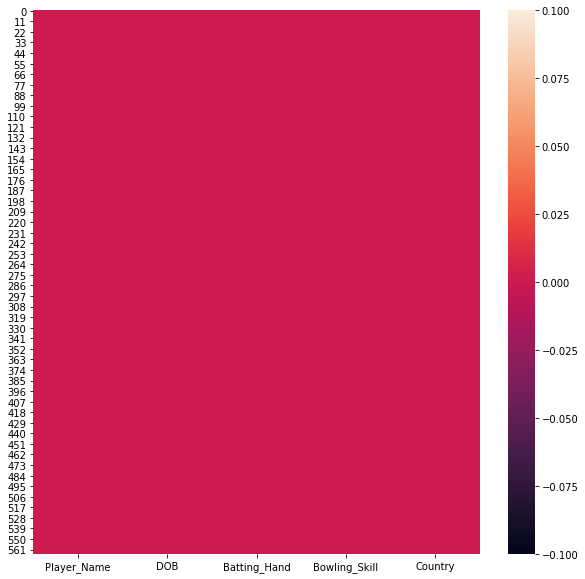

In [94]:
#Plotting the heatmap after filling up the missing categorical values
plt.figure(figsize=(10,10))
sns.heatmap(show1)

#Deliveries Dataset

##From the deliveries dataset:-(rows 179078, columns 21)
###*It consists of following columns- match_id, inning, batting_team,	bowling_team,	over,	ball,	batsman,	non_striker,	bowler,	is_super_over,	wide_runs,	bye_runs,	legbye_runs,	noball_runs,	penalty_runs,	batsman_runs,	extra_runs,	total_runs,	player_dismissed,	dismissal_kind,	fielder.



In [95]:
#Checking the first five observations of deliveries dataset
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [96]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [97]:
#Summing up the null values
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [98]:
show2 = deliveries_df.isnull()

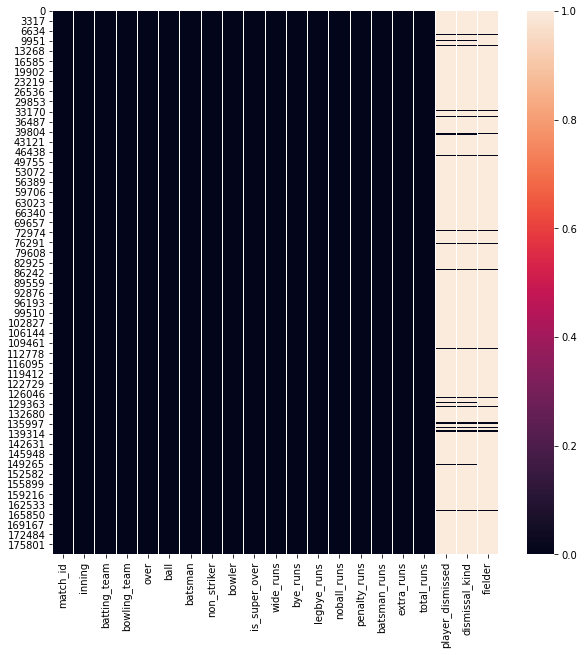

In [99]:
#Plotting the heatmap for the missing values in the deliveries dataset
plt.figure(figsize=(10,10))
sns.heatmap(show2)

##As seen above the fielder column has significant amount of missing values, so here we can drop the filelder column.

In [100]:
#Dropping the fielder column
deliveries_df = deliveries_df.drop(columns =['fielder'], axis=1)

In [101]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN


In [102]:
show3 = deliveries_df.isnull()

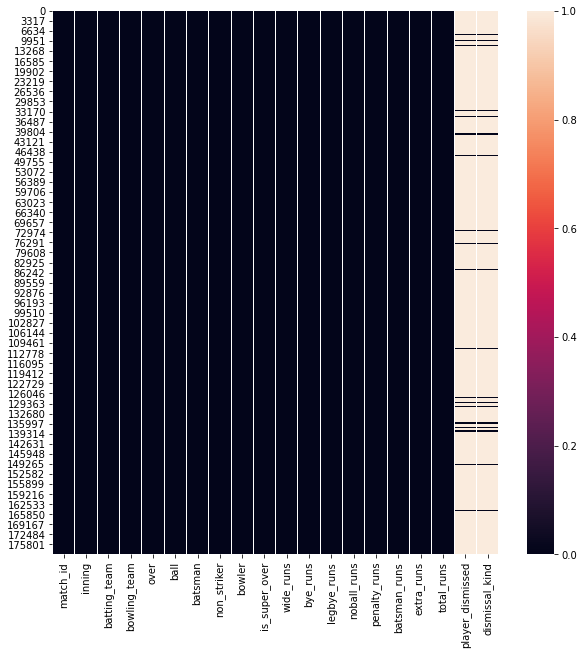

In [103]:
#Plotting the heatmap after dropping off the fielder column
plt.figure(figsize=(10,10))
sns.heatmap(show3)

#Teams Dataset

##From teams dataset:- (rows 15, column 1)
###*Just has the team names in it.

In [104]:
#Checking the first ten observations of teams dataset
teams_df.head(10)

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


In [105]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team1   15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes


In [106]:
teams_df.isnull().sum()

team1    0
dtype: int64

##Teams dataset has 'zero' null values.

#Most_runs_average_strikerate Dataset

---




##From most_runs_average_strikerate dataset:- (rows 516, columns 6)
###*It consists of following columns- batsman, total_runs, out,	numberofballs, average, strikerate.

In [107]:
#Checking the first ten observations of most_runs_average_strikerate dataset
most_runs_average_strikerate_df.head(10)

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999
9,G Gambhir,4219,134,3400,31.485075,124.088235


In [108]:
most_runs_average_strikerate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


In [109]:
most_runs_average_strikerate_df.isnull().sum()

batsman           0
total_runs        0
out               0
numberofballs     0
average          34
strikerate        0
dtype: int64

In [110]:
show4 = most_runs_average_strikerate_df.isnull()

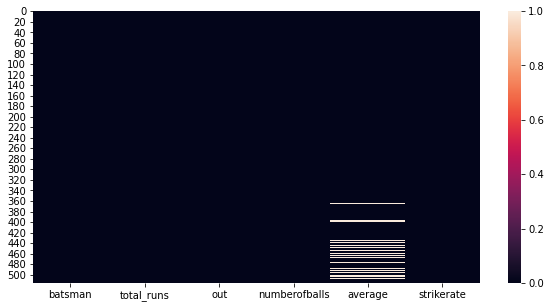

In [111]:
#Plotting the heatmap for the missing values in the dataset
plt.figure(figsize=(10,5))
sns.heatmap(show4)

In [112]:
#Treating the missing numerical values
filling_num = most_runs_average_strikerate_df.fillna(most_runs_average_strikerate_df.mean(axis=0))

In [113]:
show5 = filling_num.isnull()

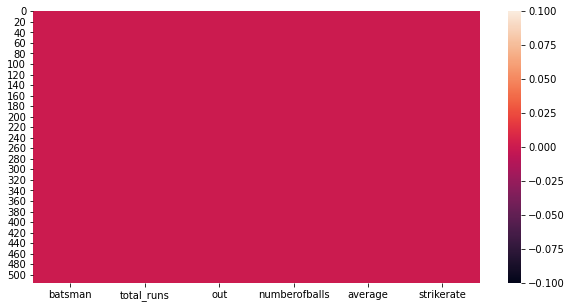

In [114]:
#Plotting the heatmap for the missing numerical values in the dataset
plt.figure(figsize=(10,5))
sns.heatmap(show5)

#Teamwise_home_and_away Dataset

##From teamwise_home_and_away datset:- (rows 14, columns 7)
###*It consists of following columns- team, home_wins, away_wins, home_matches	away_matches,	home_win_percentage,	away_win_percentage.

In [116]:
#Checking the first ten observations of teamwise_home_and_away dataset
teamwise_home_and_away_df.head(10)


,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [117]:
teamwise_home_and_away_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes


In [118]:
teamwise_home_and_away_df.isnull().sum()

team                   0
home_wins              0
away_wins              0
home_matches           0
away_matches           0
home_win_percentage    0
away_win_percentage    0
dtype: int64

##The dataset above has no missing values to treat

##As our dataset has been cleaned, we can now do the in-depth analysis and visualization.